# Обработка стрельб

In [2]:
import pandas as pd 
import numpy as np
import math
from matplotlib import patches
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Представление исходных данных

In [3]:
xi = [[0, 15],
      [1, 21], 
      [2, 11], 
      [3, 63], 
      [4, 56], 
      [5, 60], 
      [6, 53], 
      [7, 93], 
      [8, 87], 
      [9, 114]]
zi = [[0, 284],
      [1, 251], 
      [2, 215], 
      [3, 270], 
      [4, 245], 
      [5, 225], 
      [6, 208], 
      [7, 228], 
      [8, 185], 
      [9, 180]]

In [20]:
df = pd.DataFrame(xi, columns=[ 'id', 'X'])
df1 = pd.DataFrame(zi, columns=[ 'id', 'Z'])
df= df.merge(df1, on='id')
del df['id']
df.head()

,X,Z
0,15,284
1,21,251
2,11,215
3,63,270
4,56,245


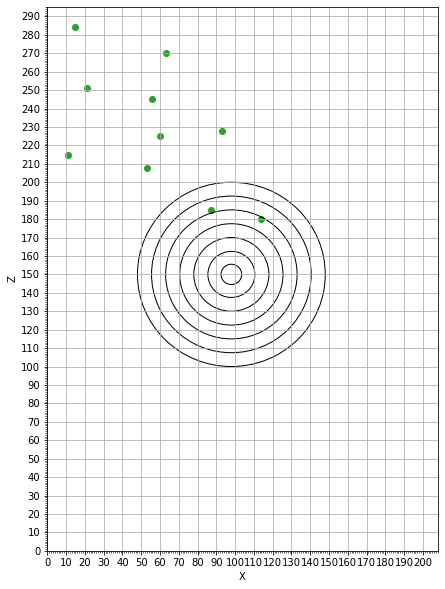

In [19]:
from matplotlib.patches import Circle
c1 = patches.Circle( xy= (98, 150),  radius=5.5, fill=None)
c2 = patches.Circle( xy= (98, 150),  radius=12.5, fill=None)
c3 = patches.Circle( xy= (98, 150),  radius=20, fill=None)
c4 = patches.Circle( xy= (98, 150),  radius=27.5, fill=None)
c5 = patches.Circle( xy= (98, 150),  radius=35, fill=None)
c6 = patches.Circle( xy= (98, 150),  radius=42.5, fill=None)
c7 = patches.Circle( xy= (98, 150),  radius=50, fill=None)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['X'], df['Z'], color='tab:green')
plt.xlabel('X')
plt.ylabel('Z')
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.set_xlim(0, 208)
ax.set_ylim(0, 295)
ax.add_patch(c1)
ax.add_patch(c2)
ax.add_patch(c3)
ax.add_patch(c4)
ax.add_patch(c5)
ax.add_patch(c6)
ax.add_patch(c7)

plt.grid()
plt.rcParams['figure.figsize'] = [7, 14]
plt.savefig('1.png')

Получен график, на котором представлена мишень и попадание 10 выстрелов 

## Математическая обработка данных

Чтобы построить оси и эллипс рассеивания, посчитаем математические ожидания, дисперсии, их отклонения и корреляционные моменты для координат

In [22]:
Mx=sum(df['X'])/10
Mx

57.3

In [23]:
Mz=sum(df['Z'])/10
Mz

229.1

In [24]:
list = []
for item in range (len(df['X'])):
    list.append(item)

list1 = []
for item in range (len(df['X'])):
    list1.append(item)
    
for i in range (len(df['X'])):
    list[i] = df['X'][i]-Mx
    
for i in range (len(df['Z'])):
    list1[i] = (df['Z'][i]-Mz)

Представим полученные величины в виде таблицы

In [25]:
df['X-Mx']= list
df['Z-Mz']= list1
df['(X-Mx)^2']= df['X-Mx']**2
df['(Z-Mz)^2']= df['Z-Mz']**2
df['(X-Mx)*(Z-Mz)']= df['Z-Mz']*df['X-Mx']
df.head(10)

,X,Z,X-Mx,Z-Mz,(X-Mx)^2,(Z-Mz)^2,(X-Mx)*(Z-Mz)
0,15,284,-42.3,54.9,1789.29,3014.01,-2322.27
1,21,251,-36.3,21.9,1317.69,479.61,-794.97
2,11,215,-46.3,-14.1,2143.69,198.81,652.83
3,63,270,5.7,40.9,32.49,1672.81,233.13
4,56,245,-1.3,15.9,1.69,252.81,-20.67
5,60,225,2.7,-4.1,7.29,16.81,-11.07
6,53,208,-4.3,-21.1,18.49,445.21,90.73
7,93,228,35.7,-1.1,1274.49,1.21,-39.27
8,87,185,29.7,-44.1,882.09,1944.81,-1309.77
9,114,180,56.7,-49.1,3214.89,2410.81,-2783.97


In [19]:
## на всякий случай сохраним данные 
df.to_csv('df.csv')

Приступим к вычислению наклона осей рассеивания и построим эллипс

In [26]:
Dx = sum (df['(X-Mx)^2'])/9
Dx

1186.8999999999999

In [27]:
Dz = sum (df['(Z-Mz)^2'])/9
Dz

1159.6555555555558

In [28]:
Kxz = sum (df['(X-Mx)*(Z-Mz)']) /9
Kxz

-700.588888888889

In [29]:
tg = 2*Kxz/(Dz-Dx)
tg

51.429853181077384

In [30]:
a2 = math.atan(tg)

In [31]:
alpha = a2/2
alpha

0.7756774083864036

In [32]:
tan = math.tan(alpha)
tan

0.9807450560803783

In [33]:
tan1 = math.tan(alpha + math.pi/2)
tan1

-1.0196329757669902

In [34]:
b1 = Mz - tan1*57.3

In [35]:
b = Mz-tan*57.3

In [36]:
Dksi = Dx*math.sin(alpha)*math.sin(alpha)+Dz*math.cos(alpha)*math.cos(alpha)+Kxz*math.sin(2*alpha)*math.sin(2*alpha)
Dksi

472.6888388431728

In [37]:
Deta = Dx*math.cos(alpha)*math.cos(alpha)+Dz*math.sin(alpha)*math.sin(alpha)-Kxz*math.sin(a2)*math.sin(2*alpha)
Deta

1873.8667167123829

In [38]:
SigmaKsi = math.sqrt(Dksi)
SigmaKsi

21.74140839143529

In [39]:
SigmaEta = math.sqrt(Deta)
SigmaEta

43.28818218304371

In [40]:
Eksi = 0.6745 * SigmaKsi
Eksi

14.664579960023103

In [41]:
Eeta = 0.6745 * SigmaEta
Eeta

29.19787888246298

In [66]:
# коэф Стьюдента
tb = 1.282

In [43]:
EpsKsi = tb * math.sqrt(2/9)*Dksi
EpsKsi

285.66505442552915

In [44]:
EpsEta = tb * math.sqrt(2/9)*Deta
EpsEta

1132.453727754359

In [45]:
IbKsi = [Dksi-EpsKsi , Dksi+EpsKsi]
IbKsi

[187.02378441764364, 758.353893268702]

In [46]:
IbEta = [Deta-EpsEta , Deta+EpsEta]
IbEta

[741.4129889580238, 3006.3204444667417]

In [47]:
Sigma1Ksi = math.sqrt (Dksi-EpsKsi)
Sigma1Ksi

13.675663947964049

In [48]:
Sigma2Ksi = math.sqrt (Dksi+EpsKsi)
Sigma2Ksi

27.538226037068945

In [49]:
Sigma1Eta = math.sqrt (Deta-EpsEta)
Sigma1Eta

27.228899885195947

In [50]:
Sigma2Eta = math.sqrt (Deta+EpsEta)
Sigma2Eta

54.82992289313146

In [51]:
Epsx = tb*math.sqrt(Dx/10)
Epsx

13.966741336475017

In [52]:
IbMx = [Mx-Epsx , Mx+Epsx]
IbMx

[43.33325866352498, 71.26674133647501]

In [53]:
Epsz = tb*math.sqrt(Dz/10)
Epsz

13.805512439923733

In [54]:
IbMz = [Mz-Epsz , Mz+Epsz]
IbMz

[215.29448756007625, 242.90551243992374]

In [55]:
q = 2*SigmaKsi
q1 = 2*SigmaEta

Представим на графике попадания, оси и эллипс рассеивания

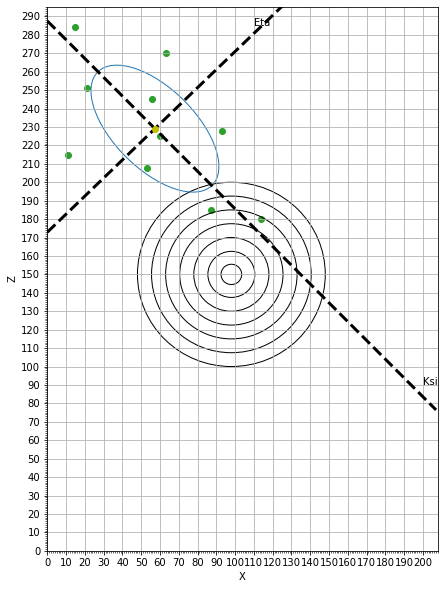

In [58]:
from matplotlib.patches import Ellipse
ell = patches.Ellipse( xy= (Mx, Mz),  width=q , height=q1, angle = math.atan(tan)*180/math.pi, fill = None, color='tab:blue' )
c1 = patches.Circle( xy= (98, 150),  radius=5.5, fill=None)
c2 = patches.Circle( xy= (98, 150),  radius=12.5, fill=None)
c3 = patches.Circle( xy= (98, 150),  radius=20, fill=None)
c4 = patches.Circle( xy= (98, 150),  radius=27.5, fill=None)
c5 = patches.Circle( xy= (98, 150),  radius=35, fill=None)
c6 = patches.Circle( xy= (98, 150),  radius=42.5, fill=None)
c7 = patches.Circle( xy= (98, 150),  radius=50, fill=None)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.xlabel('X')
plt.ylabel('Z')
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.set_xlim(0, 208)
ax.set_ylim(0, 295)
ax.add_patch(c1)
ax.add_patch(c2)
ax.add_patch(c3)
ax.add_patch(c4)
ax.add_patch(c5)
ax.add_patch(c6)
ax.add_patch(c7)

plt.plot(np.arange(0, 208) * tan + b, 'k--', linewidth = 3)
plt.plot(np.arange(0, 208) * tan1 + b1, 'k--', linewidth = 3)
ax.add_patch(ell)
ax.scatter(df['X'], df['Z'], color='tab:green')
plt.plot(Mx, Mz, 'oy')
plt.text (110, 285, 'Eta')
plt.text (200, 90, 'Ksi')
plt.grid()
plt.rcParams['figure.figsize'] = [7, 14]
plt.savefig('2.png')

## Определение закона распределения

In [59]:
Sigmax = math.sqrt(sum(df['(X-Mx)^2']) / 10)
Sigmax

32.683482066634205

In [60]:
Sigmaz = math.sqrt(sum(df['(Z-Mz)^2']) / 10)
Sigmaz

32.30619135707582

In [61]:
Histox = [-3*Sigmax, -2*Sigmax, -1*Sigmax, 0, Sigmax, 2*Sigmax, 3*Sigmax]
Histoz = [-3*Sigmaz, -2*Sigmaz, -1*Sigmaz, 0, Sigmaz, 2*Sigmaz, 3*Sigmaz] 

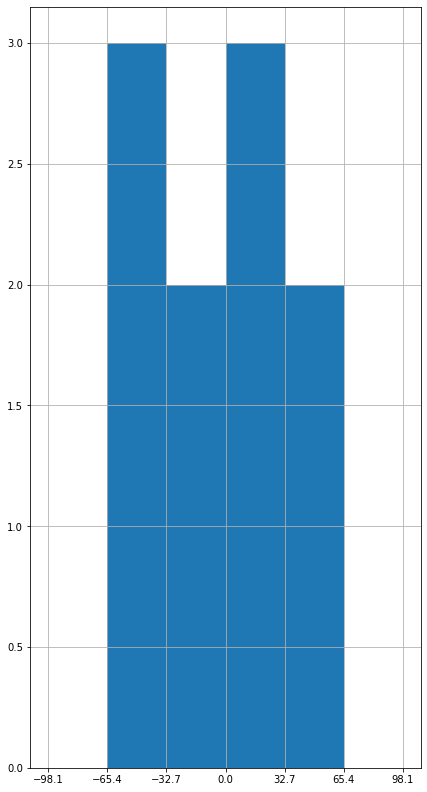

In [62]:
plt.hist(df['X-Mx'], bins = 6, range = [-98.1, 98.1])
plt.grid()
plt.xticks(Histox)
plt.savefig('3.png')

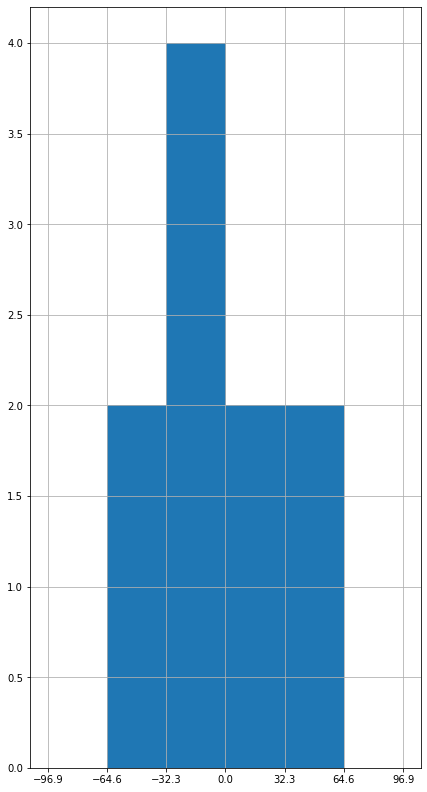

In [63]:
plt.hist(df['Z-Mz'], bins = 6, range = [-96.9, 96.9])
plt.grid()
plt.xticks(Histoz)
plt.savefig('4.png')

In [64]:
tabl2 = [[1, 'mi',0 , 1, 4, 3, 2, 0],
         [2, 'Ui+1','' , '', '', '', '', ''],
         [3, 'Ui', '' , '', '', '', '', ''],
         [4, 'Фu+1','' , '', '', '', '', ''],
         [5, 'Фui', '' , '', '', '', '', ''],
         [6, 'pi', '' , '', '', '', '', ''],
         [7, 'npi', '' , '', '', '', '', ''],
         [8, 'mi-npi', '' , '', '', '', '', ''],
         [9, '(mi-npi)^2','' , '', '', '', '', ''],
         [10, '(mi-npi)^2/npi','' , '', '', '', '', ''],
    
]

In [65]:
df3 = pd.DataFrame (tabl2, columns = ["№", 'Разряды', '-z3, -z2', '-z2, -z1', '-z1, 0', '0, z1', 'z1, z2', 'z2, z3'])
df3.head(10)

,№,Разряды,"-z3, -z2","-z2, -z1","-z1, 0","0, z1","z1, z2","z2, z3"
0,1,mi,0,1,4,3,2,0
1,2,Ui+1,,,,,,
2,3,Ui,,,,,,
3,4,Фu+1,,,,,,
4,5,Фui,,,,,,
5,6,pi,,,,,,
6,7,npi,,,,,,
7,8,mi-npi,,,,,,
8,9,(mi-npi)^2,,,,,,
9,10,(mi-npi)^2/npi,,,,,,


In [294]:
list5 = []
for item in range (6):
    list5.append(item)
    
for i in range (6):
    list5[i] = Histox[i+1]/(0.6745*Sigmax)
list5

[-2.9651593773165312,
 -1.4825796886582656,
 0.0,
 1.4825796886582656,
 2.9651593773165312,
 4.447739065974797]

In [295]:
df3['-z3, -z2'][1] = list5[0]
df3['-z2, -z1'][1] = list5[1]
df3['-z1, 0'][1] = list5[2]
df3[ '0, z1'][1] = list5[3]
df3['z1, z2'][1] = list5[4]
df3['z2, z3'][1] = list5[5]

<ipython-input-295-864f3c67fb45>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['-z3, -z2'][1] = list5[0]
<ipython-input-295-864f3c67fb45>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['-z2, -z1'][1] = list5[1]
<ipython-input-295-864f3c67fb45>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['-z1, 0'][1] = list5[2]
<ipython-input-295-864f3c67fb45>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [296]:
list6 = []
for item in range (6):
    list6.append(item)
    
for i in range (6):
    list6[i] = Histox[i]/(0.6745*Sigmax)
list6

[-4.447739065974797,
 -2.9651593773165312,
 -1.4825796886582656,
 0.0,
 1.4825796886582656,
 2.9651593773165312]

In [297]:
df3['-z3, -z2'][2] = list6[0]
df3['-z2, -z1'][2] = list6[1]
df3['-z1, 0'][2] = list6[2]
df3[ '0, z1'][2] = list6[3]
df3['z1, z2'][2] = list6[4]
df3['z2, z3'][2] = list6[5]

df3['-z3, -z2'][3] = 0.975
df3['-z2, -z1'][3] = 0.6883
df3['-z1, 0'][3] = 0
df3[ '0, z1'][3] = 0.6883
df3['z1, z2'][3] = 0.975
df3['z2, z3'][3] = 0.997

df3['-z3, -z2'][4] = 0.997
df3['-z2, -z1'][4] = 0.975
df3['-z1, 0'][4] = 0.6883
df3[ '0, z1'][4] = 0
df3['z1, z2'][4] = 0.6883
df3['z2, z3'][4] = 0.975

df3['-z3, -z2'][5] = 0.5*math.fabs(df3['-z3, -z2'][3]-df3['-z3, -z2'][4])
df3['-z2, -z1'][5] = 0.5*math.fabs(df3['-z2, -z1'][3]-df3['-z2, -z1'][4])
df3['-z1, 0'][5] = 0.5*math.fabs(df3['-z1, 0'][3]-df3['-z1, 0'][4])
df3[ '0, z1'][5] = 0.5*math.fabs(df3['0, z1'][3]-df3['0, z1'][4])
df3['z1, z2'][5] = 0.5*math.fabs(df3['z1, z2'][3]-df3['z1, z2'][4])
df3['z2, z3'][5] = 0.5*math.fabs(df3['z2, z3'][3]-df3['z2, z3'][4])

df3['-z3, -z2'][6] = df3['-z3, -z2'][5]*10
df3['-z2, -z1'][6] = df3['-z2, -z1'][5]*10
df3['-z1, 0'][6] = df3['-z1, 0'][5]*10
df3[ '0, z1'][6] = df3[ '0, z1'][5]*10
df3['z1, z2'][6] = df3['z1, z2'][5]*10
df3['z2, z3'][6] = df3['z2, z3'][5]*10

df3['-z3, -z2'][7] = df3['-z3, -z2'][0]-df3['-z3, -z2'][6]
df3['-z2, -z1'][7] = df3['-z2, -z1'][0]-  df3['-z2, -z1'][6]
df3['-z1, 0'][7] = df3['-z1, 0'][0] - df3['-z1, 0'][6]
df3[ '0, z1'][7] = df3[ '0, z1'][0] - df3[ '0, z1'][6]
df3['z1, z2'][7] = df3['z1, z2'][0] - df3['z1, z2'][6]
df3['z2, z3'][7] = df3['z1, z2'][0] - df3['z1, z2'][6]

df3['-z3, -z2'][8] = df3['-z3, -z2'][7]**2
df3['-z2, -z1'][8] = df3['-z2, -z1'][7]**2
df3['-z1, 0'][8] = df3['-z1, 0'][7]**2
df3[ '0, z1'][8] = df3[ '0, z1'][7]**2
df3['z1, z2'][8] = df3['z1, z2'][7]**2
df3['z2, z3'][8] = df3['z2, z3'][7]**2

df3['-z3, -z2'][9] = df3['-z3, -z2'][8]/df3['-z3, -z2'][6]
df3['-z2, -z1'][9] = df3['-z2, -z1'][8]/df3['-z2, -z1'][6]
df3['-z1, 0'][9] = df3['-z1, 0'][8]/df3['-z1, 0'][6]
df3[ '0, z1'][9] = df3[ '0, z1'][8]/df3[ '0, z1'][6]
df3['z1, z2'][9] = df3['z1, z2'][8]/df3['z1, z2'][6]
df3['z2, z3'][9] = df3['z2, z3'][8]/df3['z2, z3'][6]

<ipython-input-297-09f81a2e12bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['-z3, -z2'][2] = list6[0]
<ipython-input-297-09f81a2e12bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['-z2, -z1'][2] = list6[1]
<ipython-input-297-09f81a2e12bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['-z1, 0'][2] = list6[2]
<ipython-input-297-09f81a2e12bb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [298]:
df3

,№,Разряды,"-z3, -z2","-z2, -z1","-z1, 0","0, z1","z1, z2","z2, z3"
0,1,mi,0,1,4,3,2,0
1,2,Ui+1,-2.96516,-1.48258,0,1.48258,2.96516,4.44774
2,3,Ui,-4.44774,-2.96516,-1.48258,0,1.48258,2.96516
3,4,Фu+1,0.975,0.6883,0,0.6883,0.975,0.997
4,5,Фui,0.997,0.975,0.6883,0,0.6883,0.975
5,6,pi,0.011,0.14335,0.34415,0.34415,0.14335,0.011
6,7,npi,0.11,1.4335,3.4415,3.4415,1.4335,0.11
7,8,mi-npi,-0.11,-0.4335,0.5585,-0.4415,0.5665,0.5665
8,9,(mi-npi)^2,0.0121,0.187922,0.311922,0.194922,0.320922,0.320922
9,10,(mi-npi)^2/npi,0.11,0.131093,0.0906356,0.0566387,0.223873,2.91747


In [299]:
Hi = df3['-z3, -z2'][9] + df3['-z2, -z1'][9] + df3['-z1, 0'][9] + df3[ '0, z1'][9] + df3['z1, z2'][9] + df3['z2, z3'][9]
Hi

3.529715814518981

In [ ]:
r = 3
p = 0.3